# Billionaires data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch

%matplotlib inline

In [8]:
sns.set_style('darkgrid')

In [3]:
df_bill = pd.read_csv("./Billionaires Statistics Dataset.csv")

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df_bill.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [7]:
df_bill.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [9]:
df_bill_num = df_bill[df_bill.select_dtypes(include=['number', 'bool']).columns].copy()
df_bill_str = df_bill[df_bill.select_dtypes(include=['object']).columns].copy()

In [10]:
df_bill_str = df_bill_str.astype(
    {
        'category' : 'category',
        'status' : 'category',
        'gender' : 'category',
        'birthDate' : 'datetime64[ns]',
        'date' : 'datetime64[ns]',
    }
)

In [12]:
df_bill_num.isnull().sum()

rank                                            0
finalWorth                                      0
age                                            65
selfMade                                        0
birthYear                                      76
birthMonth                                     76
birthDay                                       76
cpi_country                                   184
cpi_change_country                            184
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
life_expectancy_country                       182
tax_revenue_country_country                   183
total_tax_rate_country                        182
population_country                            164
latitude_country                              164
longitude_country                             164
dtype: int64

In [13]:
df_bill_num = df_bill_num.fillna(0)

In [14]:
df_bill_num = df_bill_num.astype(
    {
        'age' : 'int',
        'birthYear' : 'int',
        'birthMonth' : 'int',
        'birthDay' : 'int',
        'population_country' : 'int'
    }
)

In [16]:
df_bill_num['gdp_country'] = df_bill_str['gdp_country'].copy()

In [17]:
df_bill_num.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,"$2,715,518,274,227"
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,"$21,427,700,000,000"
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,"$21,427,700,000,000"
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,"$21,427,700,000,000"
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,"$21,427,700,000,000"


In [18]:
df_bill_num['gdp_country'] = df_bill_num['gdp_country'] \
    .str.replace('$', '').str.replace(',', '').str.strip()
    
df_bill_num['gdp_country'] = pd.to_numeric(df_bill_num['gdp_country'])

In [19]:
df_bill_num.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2.715518e+12
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,2.142770e+13
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,2.142770e+13
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,2.142770e+13
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,2.142770e+13


In [21]:
df_bill_num['gdp_country'] = df_bill_num['gdp_country'].fillna(0)

In [22]:
df_bill_num['gdp_country'] = df_bill_num['gdp_country'].astype('int')

In [23]:
df_bill_num.dtypes

rank                                            int64
finalWorth                                      int64
age                                             int64
selfMade                                         bool
birthYear                                       int64
birthMonth                                      int64
birthDay                                        int64
cpi_country                                   float64
cpi_change_country                            float64
gross_tertiary_education_enrollment           float64
gross_primary_education_enrollment_country    float64
life_expectancy_country                       float64
tax_revenue_country_country                   float64
total_tax_rate_country                        float64
population_country                              int64
latitude_country                              float64
longitude_country                             float64
gdp_country                                     int64
dtype: object

# Step 1: Descriptive analysis

## 1. 1. Summary Statistics:

In [24]:
df_bill_num.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2.640000e+03,2640.000000,2640.000000,2.640000e+03
mean,1289.159091,4623.787879,63.536364,1900.840152,5.575000,11.751515,118.851053,4.060000,62.591174,95.806477,72.737083,11.676553,40.932538,4.785107e+08,32.735338,11.801475,1.086333e+13
std,739.693726,9834.240939,16.534444,327.583975,3.780204,9.982269,41.347766,3.667625,26.726648,26.392395,20.120774,6.081301,16.169132,5.506987e+08,18.497489,84.078716,9.685727e+12
min,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-40.900557,-106.346771,0.000000e+00
25%,659.000000,1500.000000,55.000000,1947.000000,2.000000,1.000000,114.410000,1.400000,50.600000,100.200000,77.000000,9.400000,36.600000,6.029740e+07,35.861660,-95.712891,1.392681e+12
50%,1312.000000,2300.000000,65.000000,1957.000000,5.000000,10.000000,117.240000,2.900000,63.200000,101.800000,78.500000,9.600000,36.600000,3.282395e+08,37.090240,10.451526,3.845630e+12
75%,1905.000000,4200.000000,74.000000,1966.000000,9.000000,20.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.000000,59.100000,1.366418e+09,37.090240,104.195397,2.142770e+13
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,2.142770e+13


## 1.2. Wealth Distribution:
- Histogram for finalWorth to see the distribution of billionaire wealth.
- Boxplot for finalWorth grouped by category (industry).


### Histogram for finalWorth to see the distribution of billionaire wealth.

In [25]:
final_worth_mean = df_bill_num['finalWorth'].mean()
final_worth_median = df_bill_num['finalWorth'].median()

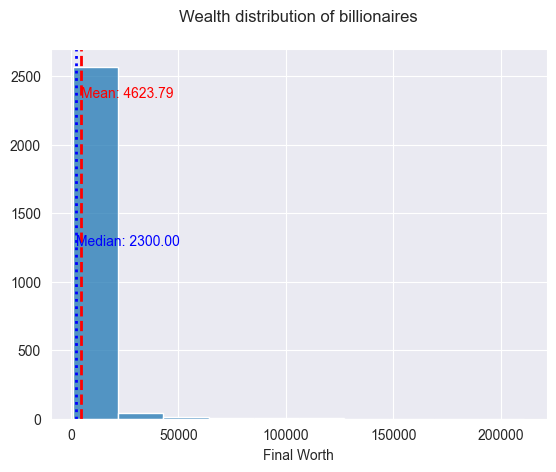

In [46]:
# plt.figure(figsize=(8, 8))
sns.histplot(data=df_bill_num, x='finalWorth', kde=False, bins=10)

# Add mean line with annotation
plt.axvline(final_worth_mean, color='red', linestyle='dashed', linewidth=2)
plt.text(final_worth_mean, plt.ylim()[1] * 0.9, f'Mean: {final_worth_mean:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(final_worth_median, color='blue', linestyle='dotted', linewidth=2)
plt.text(final_worth_median, plt.ylim()[1] * 0.5, f'Median: {final_worth_median:.2f}', rotation=0, va='top', color='blue')

plt.title("Wealth distribution of billionaires", pad=20)
plt.xlabel("Final Worth")
plt.ylabel(None)
plt.show()

### Boxplot for finalWorth grouped by category (industry).

In [33]:
df_bill_num_cat = df_bill_num.copy()

In [34]:
df_bill_num_cat['category'] = df_bill_str['category'].copy()

In [70]:
total_final_worth_by_category = df_bill_num_cat.groupby('category', observed=True)['finalWorth'].sum().reset_index()

In [ ]:
def create_violin_plot(plot_data, plot_x, plot_y, plot_title, **kwargs):
    plt.figure(figsize=(12, 12))
    sns.violinplot(data=plot_data, x=plot_x, y=plot_y, hue=plot_y, palette='tab10', legend=False)
    plt.title(plot_title, pad=20, fontdict={"fontsize" : 20})
    plt.xlabel(plot_x, labelpad=10, fontdict={"fontsize" : 14})
    plt.xticks(fontsize=12)
    plt.ylabel(plot_y, labelpad=10, fontdict={"fontsize" : 14})
    plt.yticks(fontsize=12)
    plt.show()

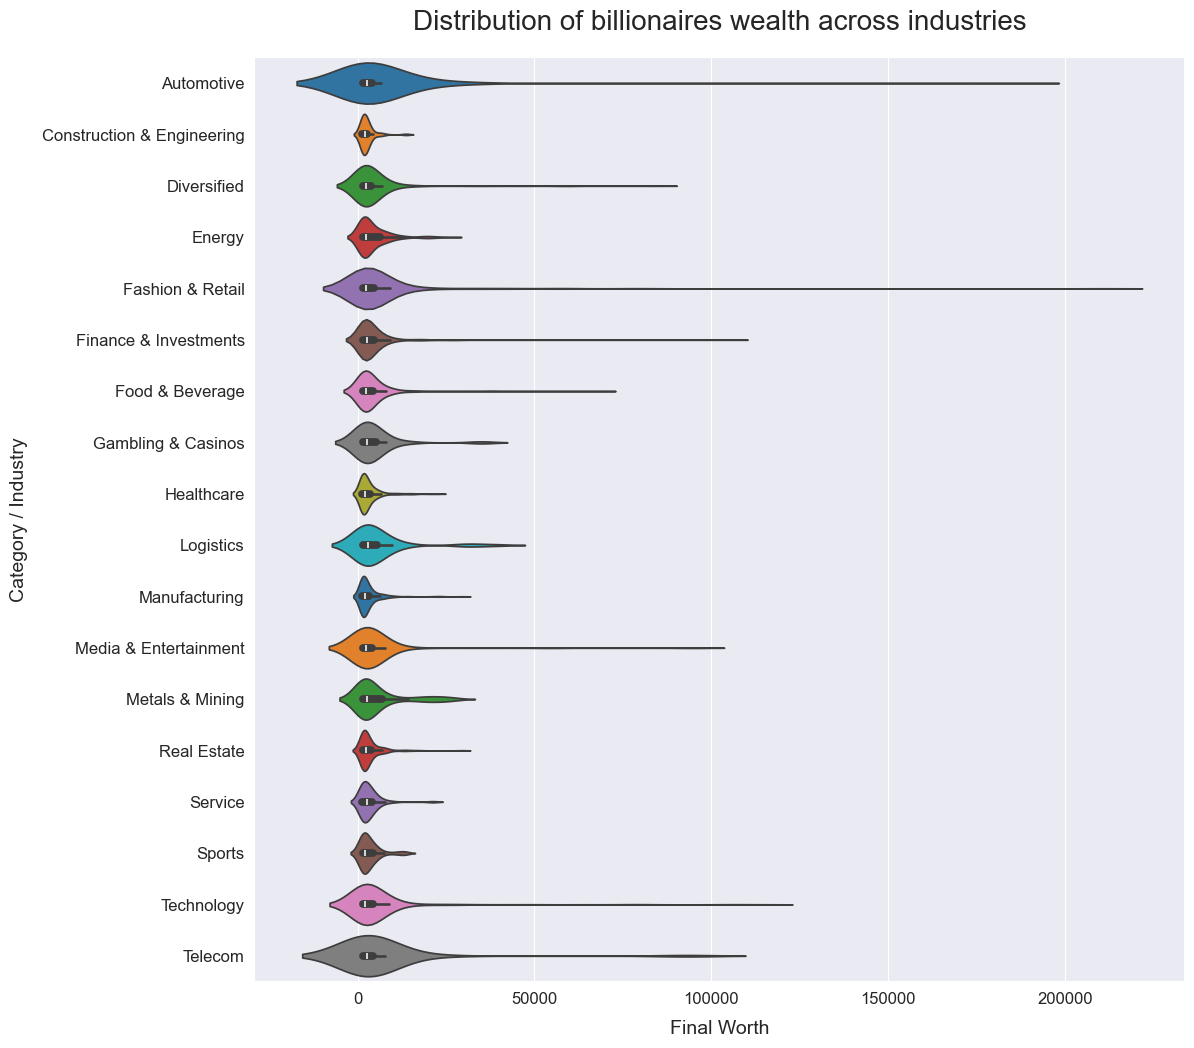

In [119]:
plt.figure(figsize=(12, 12))
sns.violinplot(data=df_bill_num_cat, x='finalWorth', y='category', hue='category', palette='tab10')
plt.title("Distribution of billionaires wealth across industries", pad=20, fontdict={"fontsize" : 20})
plt.xlabel("Final Worth", labelpad=10, fontdict={"fontsize" : 14})
plt.xticks(fontsize=12)
plt.ylabel("Category / Industry", labelpad=10, fontdict={"fontsize" : 14})
plt.yticks(fontsize=12)
plt.show()


In [67]:
df_bill_num_cat['country'] = df_bill_str['country'].copy()

In [97]:
total_final_worth_by_country = df_bill_num_cat.groupby('country', observed=True)['finalWorth'].sum().reset_index()

In [98]:
total_final_worth_by_country

,country,finalWorth
0,Algeria,4600
1,Andorra,1500
2,Argentina,11000
3,Armenia,1200
4,Australia,173500
...,...,...
73,United Kingdom,370700
74,United States,4575100
75,Uruguay,1800
76,Uzbekistan,14400


In [99]:
top_ten_countries_wealth = total_final_worth_by_country.sort_values(by='finalWorth', ascending=False).head(10)

In [100]:
top_ten_countries_wealth

,country,finalWorth
74,United States,4575100
16,China,1805500
31,India,628700
24,France,499500
26,Germany,462100
65,Switzerland,409900
73,United Kingdom,370700
58,Russia,351000
29,Hong Kong,321500
13,Canada,173900


In [101]:
top_ten_countries_wealth_selected = df_bill_num_cat[df_bill_num_cat['country'].isin(top_ten_countries_wealth['country'].values)]

In [108]:
top_ten_countries_wealth_selected.groupby('country', observed=True)['finalWorth'].agg(['sum', 'mean', 'min', 'max'])

,sum,mean,min,max
country,,,,
Canada,173900,4140.476190,1000,54400
China,1805500,3452.198853,1000,68000
France,499500,14271.428571,1000,211000
Germany,462100,4530.392157,1000,42900
Hong Kong,321500,4727.941176,1000,38000
India,628700,4004.458599,1000,83400
Russia,351000,4443.037975,1000,23700
Switzerland,409900,5255.128205,1100,39100
United Kingdom,370700,4520.731707,1000,32100


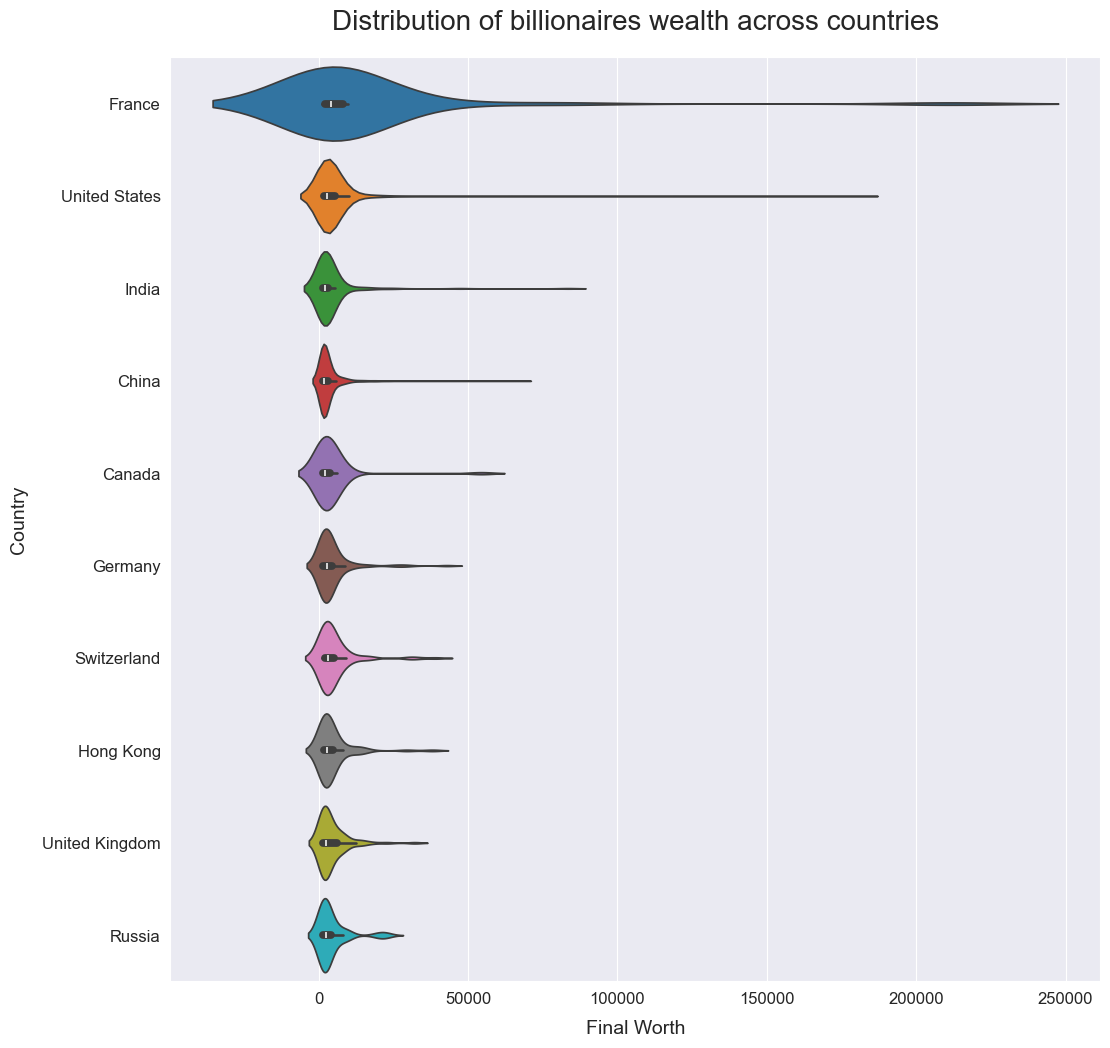

In [115]:
plt.figure(figsize=(12, 12))
sns.violinplot(data=top_ten_countries_wealth_selected, x='finalWorth', y='country', hue='country', palette='tab10')
plt.title("Distribution of billionaires wealth across countries", pad=20, fontdict={"fontsize" : 20})
plt.xlabel("Final Worth", labelpad=10, fontdict={"fontsize" : 14})
plt.xticks(fontsize=12)
plt.ylabel("Country", labelpad=10, fontdict={"fontsize" : 14})
plt.yticks(fontsize=12)
plt.show()

In [109]:
df_bill_num_cat.columns

Index(['rank', 'finalWorth', 'age', 'selfMade', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country',
       'gdp_country', 'category', 'country'],
      dtype='object')

## 1.3. Age Analysis:
- Group age into bins (e.g., 20-30, 30-40) and create a bar chart of billionaire counts per age group.

In [117]:
mean_age = df_bill_num['age'].mean()
median_age = df_bill_num['age'].median()

In [ ]:
def add_mean_line(data, var=None, **kws):
    
    # If no variable provided, skip adding mean line
    if not var: return
    
    # Calculate mean for each group
    m = np.mean(data[var])
    
    # Get current axis
    ax = plt.gca()
    
    # Add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    # Annotate group mean
    x_pos = 0.65
    if m > 5000:
        x_pos = 0.2
    
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
            transform=ax.transAxes, # Transforms positions to range from 0,0 to (1,1)
            color='maroon', fontweight='bold', fontsize=12)


def add_median_line(data, var=None, **kws):
    
    # If no variable provided, skip adding mean line
    if not var: return
    
    # Calculate median for each group
    m = np.median(data[var])
    
    # Get current axis
    ax = plt.gca()
    
    # Add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    # Annotate group mean
    x_pos = 0.65
    if m > 5000:
        x_pos = 0.2
    
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
            transform=ax.transAxes, # Transforms positions to range from 0,0 to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

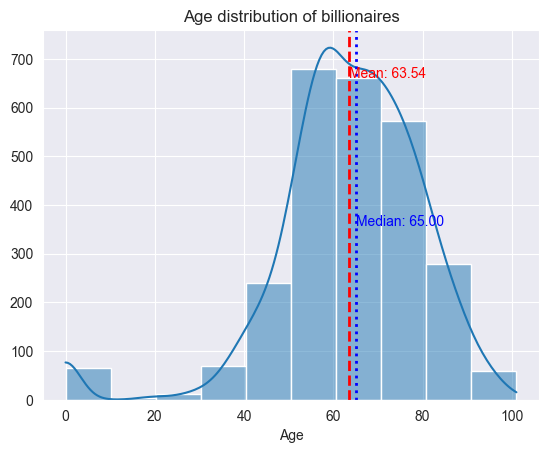

In [118]:
sns.histplot(data=df_bill_num, x='age', kde=True, bins=10)

# Add mean line with annotation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age, plt.ylim()[1] * 0.9, f'Mean: {mean_age:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(median_age, color='blue', linestyle='dotted', linewidth=2)
plt.text(median_age, plt.ylim()[1] * 0.5, f'Median: {median_age:.2f}', rotation=0, va='top', color='blue')

plt.title("Age distribution of billionaires")
plt.xlabel("Age")
plt.ylabel(None)
plt.show()

In [120]:
df_bill_num_cat['gender'] = df_bill_str['gender'].copy()

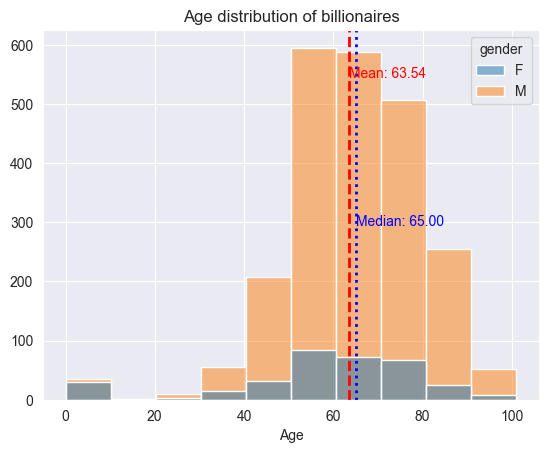

In [121]:
sns.histplot(data=df_bill_num_cat, x='age', kde=False, bins=10, hue='gender')

# Add mean line with annotation
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_age, plt.ylim()[1] * 0.9, f'Mean: {mean_age:.2f}', rotation=0, va='top', color='red')

# Add median line with annotation
plt.axvline(median_age, color='blue', linestyle='dotted', linewidth=2)
plt.text(median_age, plt.ylim()[1] * 0.5, f'Median: {median_age:.2f}', rotation=0, va='top', color='blue')

plt.title("Age distribution of billionaires")
plt.xlabel("Age")
plt.ylabel(None)
plt.show()

## 1.4. Self-Made vs. Inherited Wealth:
Compare finalWorth for selfMade=True vs. selfMade=False using boxplots or side-by-side bar charts.

In [122]:
df_bill_num['selfMade'].value_counts()

selfMade
True     1812
False     828
Name: count, dtype: int64

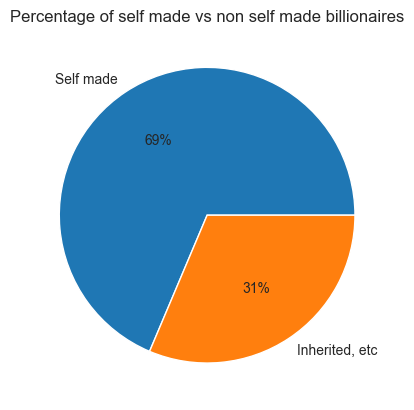

In [123]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('tab10') 

# plotting data on chart 
plt.pie(df_bill_num['selfMade'].value_counts().reset_index()['count'],
        labels=df_bill_num['selfMade'].value_counts().reset_index()['selfMade'] \
                .map(
                        {
                                True : "Self made",
                                False : 'Inherited, etc'
                        }
                )
        , colors=palette_color, autopct='%.0f%%') 

plt.title("Percentage of self made vs non self made billionaires")

# displaying chart 
plt.show() 

# Save modified datasets to new csv files

In [ ]:
df_bill_str.to_csv("./datasets/billionaires_string.csv", index=False)
df_bill_num.to_csv("./datasets/billionaires_numeric.csv", index=False)
df_bill_num_cat.to_csv("./datasets/billionaires_numeric_modified.csv", index=False)